# Checking for Correct Coverage for Conformal Prediction

In [3]:
import numpy as np
import torch
import math
import matplotlib.pyplot as plt 

## for kl_loss_corner

In [4]:
def compute_score(data_path):
    data = np.load(data_path, allow_pickle=True)
    tp = data.item()['tp']
    scores = []
    for i in range(len(tp)):
        prediction = np.array(tp[i][0])
        pred = prediction[:,:8]
        target = np.array(tp[i][1])
        cov = prediction[:,9:]
        score = np.abs(pred-target) / np.sqrt(np.exp(cov))
        for s in score:
            scores.append(list(s))
    return np.array(scores)

def compute_quantile(scores, alpha):
    n = scores.shape[0]
    q_level = np.ceil((n+1)*(1-alpha))/n
    quantile = []
    for i in range(scores.shape[1]):
        q = np.quantile(scores[:,i], q_level, interpolation='higher')
        quantile.append(q)
    return quantile

In [30]:
def show_coverage(data_path_cal, data_path_test, alpha, ty = 0, R=20, n=2000):
    scores_cal = compute_score(data_path_cal)
    scores_test = compute_score(data_path_test)
    if ty == 0:
        n_cal = math.ceil(scores_cal.shape[0] / R)
        n_test = math.ceil(scores_test.shape[0] / R)
    elif ty == 1:
        n_cal = n
        R = math.ceil(scores_cal.shape[0] / n)
        n_test = math.ceil(scores_test.shape[0] / R)
    else:
        print("ERROR")
    coverages = np.zeros((R,))
    print("R: {}, n_cal: {}, n_test: {}".format(R, n_cal, n_test))
    for r in range(R):
        np.random.shuffle(scores_cal)
        np.random.shuffle(scores_test)
        scores_cal_d = scores_cal[:n_cal,:]
        scores_test_d = scores_test[:n_test,:]
        qhat = np.array(compute_quantile(scores_cal_d, alpha))
        coverages[r] = (scores_test_d <= qhat).astype(float).mean()
    average_coverage = coverages.mean()
    print("average coverage {} for 1-alpha {}".format(average_coverage, 1-alpha))
    print("coverage diff {}".format(1-alpha - average_coverage))
    plt.hist(coverages)
    return average_coverage

### disco

R: 40, n_cal: 1040, n_test: 823
average coverage 0.6613684690157958 for 1-alpha 0.6827
coverage diff 0.02133153098420415


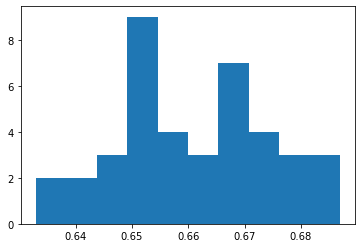

In [31]:
data_path_cal = "check/check_loss_two_step_corner_val/disco/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_corner/disco/no_rsu/match_all_data_100_5.npy"
confident_range = 0.6827
average_coverage = show_coverage(data_path_cal, data_path_test, 1-confident_range, ty=0, R=40)

R: 21, n_cal: 2000, n_test: 1566
average coverage 0.6627554278416347 for 1-alpha 0.6827
coverage diff 0.019944572158365315


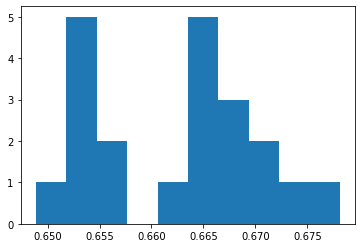

In [32]:
data_path_cal = "check/check_loss_two_step_corner_val/disco/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_corner/disco/no_rsu/match_all_data_100_5.npy"
confident_range = 0.6827
average_coverage = show_coverage(data_path_cal, data_path_test, 1-confident_range, ty=1, n=2000)

R: 21, n_cal: 2000, n_test: 1566
average coverage 0.9422284558778813 for 1-alpha 0.9973
coverage diff 0.055071544122118676


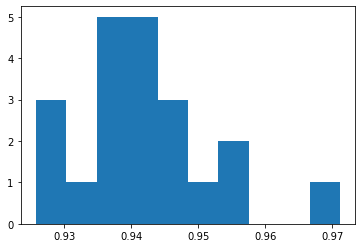

In [33]:
data_path_cal = "check/check_loss_two_step_corner_val/disco/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_corner/disco/no_rsu/match_all_data_100_5.npy"
confident_range = 0.9973
average_coverage = show_coverage(data_path_cal, data_path_test, 1-confident_range, ty=1, n=2000)

### upperbound

R: 22, n_cal: 2000, n_test: 1543
average coverage 0.6108046603428975 for 1-alpha 0.6827
coverage diff 0.07189533965710249


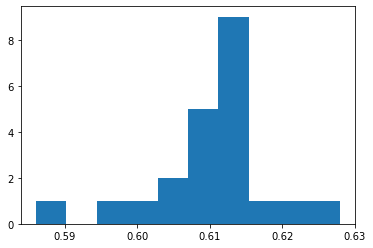

In [34]:
data_path_cal = "check/check_loss_two_step_corner_val/upperbound/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_corner/upperbound/no_rsu/match_all_data_100_5.npy"
confident_range = 0.6827
average_coverage = show_coverage(data_path_cal, data_path_test, 1-confident_range, ty=1, n=2000)

R: 22, n_cal: 2000, n_test: 1543
average coverage 0.9351911860012962 for 1-alpha 0.9973
coverage diff 0.062108813998703716


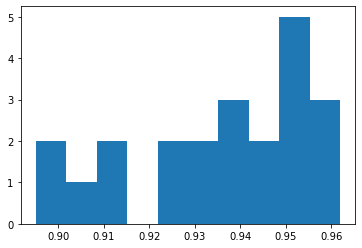

In [36]:
data_path_cal = "check/check_loss_two_step_corner_val/upperbound/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_corner/upperbound/no_rsu/match_all_data_100_5.npy"
confident_range = 0.9973
average_coverage = show_coverage(data_path_cal, data_path_test, 1-confident_range, ty=1, n=2000)

### lowerbound

R: 11, n_cal: 2000, n_test: 1883
average coverage 0.68705040312847 for 1-alpha 0.6827
coverage diff -0.004350403128470015


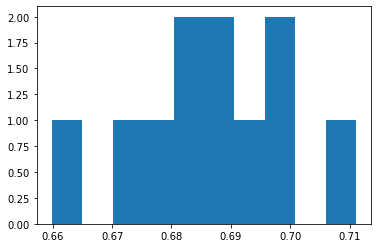

In [39]:
data_path_cal = "check/check_loss_two_step_corner_val/lowerbound/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_corner/lowerbound/no_rsu/match_all_data_100_5.npy"
confident_range = 0.6827
average_coverage = show_coverage(data_path_cal, data_path_test, 1-confident_range, ty=1, n=2000)

R: 11, n_cal: 2000, n_test: 1883
average coverage 0.9983042050885916 for 1-alpha 0.9973
coverage diff -0.0010042050885916698


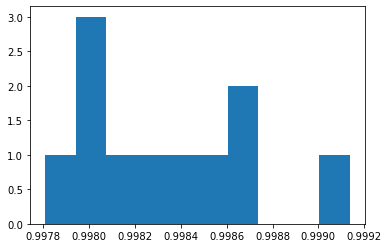

In [40]:
data_path_cal = "check/check_loss_two_step_corner_val/lowerbound/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_corner/lowerbound/no_rsu/match_all_data_100_5.npy"
confident_range = 0.9973
average_coverage = show_coverage(data_path_cal, data_path_test, 1-confident_range, ty=1, n=2000)

## for kl_loss_center_ind

In [43]:
def corner_to_center_box2d_torch(corners):
    p1 = corners[:,0:2]
    p2 = corners[:,2:4]
    p3 = corners[:,4:6]
    p4 = corners[:,6:8]
    center = (p1+p2+p3+p4)/4
    w = (np.sqrt(np.sum(np.power(p1-p4, 2), axis=1, keepdims = True)) + np.sqrt(np.sum(np.power(p2-p3, 2), axis=1, keepdims = True)))/2
    h = (np.sqrt(np.sum(np.power(p1-p2, 2), axis=1, keepdims = True)) + np.sqrt(np.sum(np.power(p3-p4, 2), axis=1, keepdims = True)))/2
    wp = np.sqrt(np.sum(np.power(p1-p4, 2), axis=1, keepdims = True))
    sina = np.divide((p4[:,1:2] - p1[:,1:2]), wp)
    cosa = np.divide((p1[:,0:1] - p4[:,0:1]), wp)
    result = np.concatenate((center, w, h, sina, cosa), axis=1)
    return result

def compute_score_center(data_path):
    data = np.load(data_path, allow_pickle=True)
    tp = data.item()['tp']
    scores = []
    for i in range(len(tp)):
        prediction = np.array(tp[i][0])
        pred = prediction[:,:8]
        target = np.array(tp[i][1])
        cov = prediction[:,9:]
        std = np.sqrt(np.exp(cov))
        pred = corner_to_center_box2d_torch(pred)
        target = corner_to_center_box2d_torch(target)
        score = np.abs(pred-target) / np.sqrt(np.exp(cov))
        for s in score:
            scores.append(list(s))
    return np.array(scores)

def compute_quantile_center(scores, alpha):
    n = scores.shape[0]
    q_level = np.ceil((n+1)*(1-alpha))/n
    quantile = []
    for i in range(scores.shape[1]):
        q = np.quantile(scores[:,i], q_level, interpolation='higher')
        quantile.append(q)
    return quantile

def show_coverage_center(data_path_cal, data_path_test, alpha, ty = 0, R=20, n=2000):
    scores_cal = compute_score_center(data_path_cal)
    scores_test = compute_score_center(data_path_test)
    if ty == 0:
        n_cal = math.ceil(scores_cal.shape[0] / R)
        n_test = math.ceil(scores_test.shape[0] / R)
    elif ty == 1:
        n_cal = n
        R = math.ceil(scores_cal.shape[0] / n)
        n_test = math.ceil(scores_test.shape[0] / R)
    else:
        print("ERROR")
    coverages = np.zeros((R,))
    print("R: {}, n_cal: {}, n_test: {}".format(R, n_cal, n_test))
    for r in range(R):
        np.random.shuffle(scores_cal)
        np.random.shuffle(scores_test)
        scores_cal_d = scores_cal[:n_cal,:]
        scores_test_d = scores_test[:n_test,:]
        qhat = np.array(compute_quantile_center(scores_cal_d, alpha))
        coverages[r] = (scores_test_d <= qhat).astype(float).mean()
    average_coverage = coverages.mean()
    print("average coverage {} for 1-alpha {}".format(average_coverage, 1-alpha))
    print("coverage diff {}".format(1-alpha - average_coverage))
    plt.hist(coverages)
    return average_coverage

### disco

R: 21, n_cal: 2000, n_test: 1511
average coverage 0.6834326053386279 for 1-alpha 0.6827
coverage diff -0.0007326053386279563


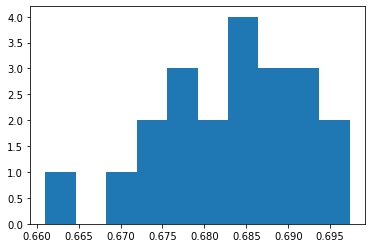

In [44]:
data_path_cal = "check/check_loss_two_step_center_ind_val/disco/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_center_ind/disco/no_rsu/match_all_data_100_5.npy"
confident_range = 0.6827
average_coverage = show_coverage_center(data_path_cal, data_path_test, 1-confident_range, ty=1, n=2000)

R: 21, n_cal: 2000, n_test: 1511
average coverage 0.9871996890527664 for 1-alpha 0.9973
coverage diff 0.010100310947233515


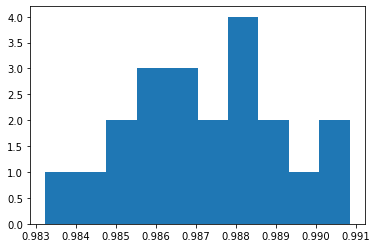

In [45]:
data_path_cal = "check/check_loss_two_step_center_ind_val/disco/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_center_ind/disco/no_rsu/match_all_data_100_5.npy"
confident_range = 0.9973
average_coverage = show_coverage_center(data_path_cal, data_path_test, 1-confident_range, ty=1, n=2000)

### upperbound

R: 22, n_cal: 2000, n_test: 1507
average coverage 0.6547173795017192 for 1-alpha 0.6827
coverage diff 0.02798262049828082


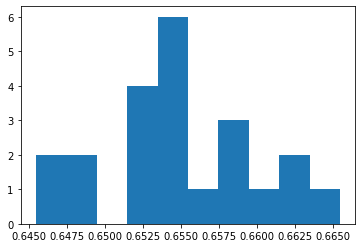

In [46]:
data_path_cal = "check/check_loss_two_step_center_ind_val/upperbound/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_center_ind/upperbound/no_rsu/match_all_data_100_5.npy"
confident_range = 0.6827
average_coverage = show_coverage_center(data_path_cal, data_path_test, 1-confident_range, ty=1, n=2000)

R: 22, n_cal: 2000, n_test: 1507
average coverage 0.980610685487925 for 1-alpha 0.9973
coverage diff 0.016689314512075004


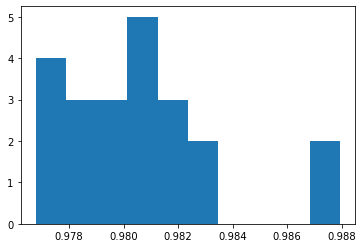

In [47]:
data_path_cal = "check/check_loss_two_step_center_ind_val/upperbound/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_center_ind/upperbound/no_rsu/match_all_data_100_5.npy"
confident_range = 0.9973
average_coverage = show_coverage_center(data_path_cal, data_path_test, 1-confident_range, ty=1, n=2000)

### lowerbound

R: 16, n_cal: 2000, n_test: 1282
average coverage 0.6662685257410297 for 1-alpha 0.6827
coverage diff 0.01643147425897029


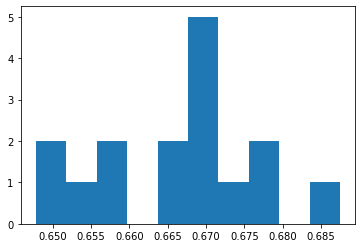

In [48]:
data_path_cal = "check/check_loss_two_step_center_ind_val/lowerbound/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_center_ind/lowerbound/no_rsu/match_all_data_100_5.npy"
confident_range = 0.6827
average_coverage = show_coverage_center(data_path_cal, data_path_test, 1-confident_range, ty=1, n=2000)

R: 16, n_cal: 2000, n_test: 1282
average coverage 0.9730807982319293 for 1-alpha 0.9973
coverage diff 0.024219201768070686


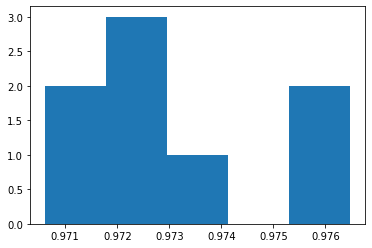

In [49]:
data_path_cal = "check/check_loss_two_step_center_ind_val/lowerbound/no_rsu/match_all_data_100_5.npy"
data_path_test = "check/check_loss_two_step_center_ind/lowerbound/no_rsu/match_all_data_100_5.npy"
confident_range = 0.9973
average_coverage = show_coverage_center(data_path_cal, data_path_test, 1-confident_range, ty=1, n=2000)